In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset 

In [8]:
df = pd.read_csv("heart.csv")

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Kaggle link of the dataset
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Attributes information

- Age -> Represents the age of an individual
  
- Sex -> 1=male, 0=female
  
- cp -> chest pain type: 0 to 4 categories
  
- trestbps -> resting blood pressure (in mm Hg on admission to the hospital)
  
- chol -> serum cholesterol in mg/dl
  
- fbs -> fasting blood sugar: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
  
- restecg -> resting electrocardiographic results
  
- thalach -> Maximum heart rate achieved
  
- exang -> exercise induced angina (1 = yes; 0 = no) 
- Exercise induced angina is a chest pain that occurs when the heart needs more oxygen than the narrow arteries could supply. This is prevalent in patients with high cholestrold
  
- oldpeak -> ST depression induced by exercise relative to rest  
- Exercise-induced ST-segment depression is a reliable ECG finding that can help diagnose obstructive coronary atherosclerosis  
- During exercise, the ST segment normally slopes sharply upwards, while the J point, the point of inflection between the S wave and ST segment, becomes depressed. The ST segment depression is measured relative to the isoelectric baseline, which is between the T and P waves
  
- slop -> the slope of the peak exercise ST segment
- The slope of the peak exercise ST segment can be categorized as upsloping, flat, or downsloping. The slope is the shift in the ST segment relative to the increase in heart rate during exercise. 
The slope of the ST segment can be used to predict the severity of coronary artery disease. One study found that the slope had an overall diagnostic accuracy of 81%

- ca -> number of major vessels (0-3) colored by flourosopy

- thal -> 1 = normal; 2 = fixed defect; 3 = reversable defect
- Thalassemia is a blood disorder that's inherited and causes the body to produce an abnormal amount or type of hemoglobin. Hemoglobin is a protein in red blood cells that carries oxygen throughout the body. When there isn't enough hemoglobin, red blood cells don't function properly and are destroyed more quickly, leading to anemia.

- The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease..

#### Some plots that explain Slope and Oldpeak

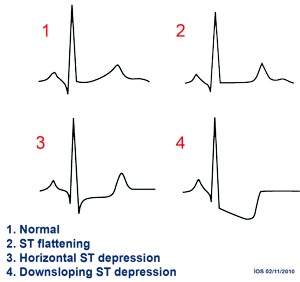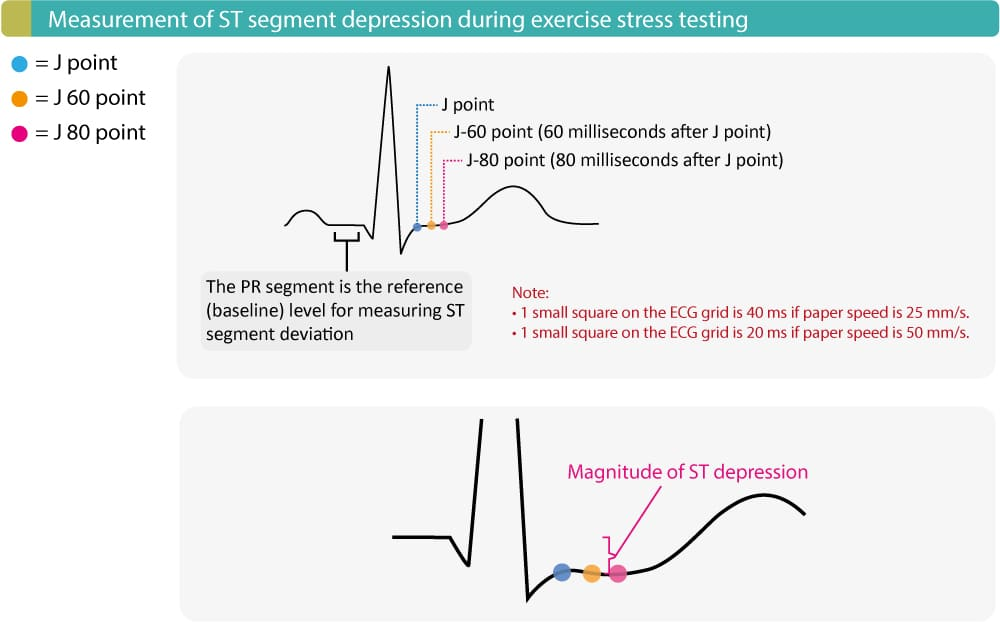

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking Nulll and duplicate values

In [19]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.duplicated().sum()

1

In [21]:
# we can drop the duplicate values
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

### Statistical summary to derive insights about our data

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### Exploratory data analysis 

In [20]:
# let us plot the distribution plots for numerical columns to understand the distribution of data

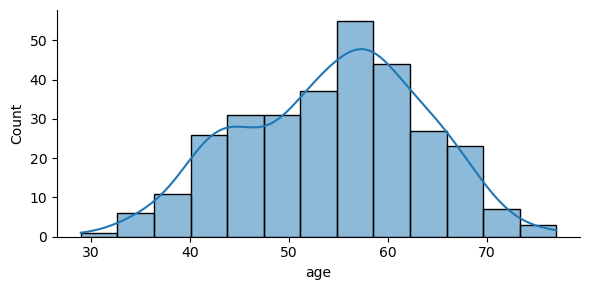

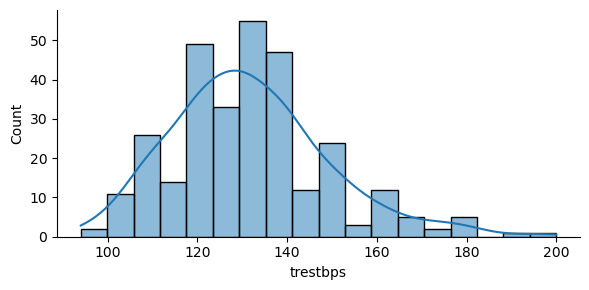

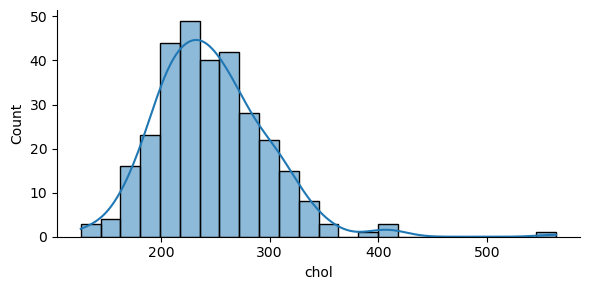

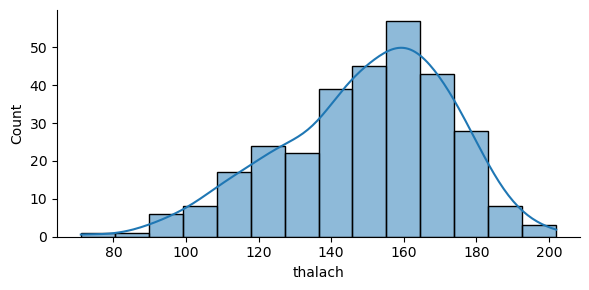

In [25]:
num_col = ["age", "trestbps", "chol", "thalach"]
for col in num_col:
    sns.displot(df[col], height=3, aspect=2, kde=True)
plt.show()

In [27]:
# Age and thalach are left skewed or negatively skewed (mean<median)
# trestbps and chol are right skewed or positively skewed (mean>median)

In [29]:
# We can check the skewness of the above columns:
print("Skewness of age:", df["age"].skew())
print("Skewness of thalach:", df["thalach"].skew())
print("Skewness of trestbps:", df["trestbps"].skew())
print("Skewness of chol:", df["chol"].skew())

Skewness of age: -0.2037432795959691
Skewness of thalach: -0.5326712468229611
Skewness of trestbps: 0.7165414326647318
Skewness of chol: 1.147332413980798


In [31]:
# Let us plot the countplots for categorical columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [33]:
cat_col = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

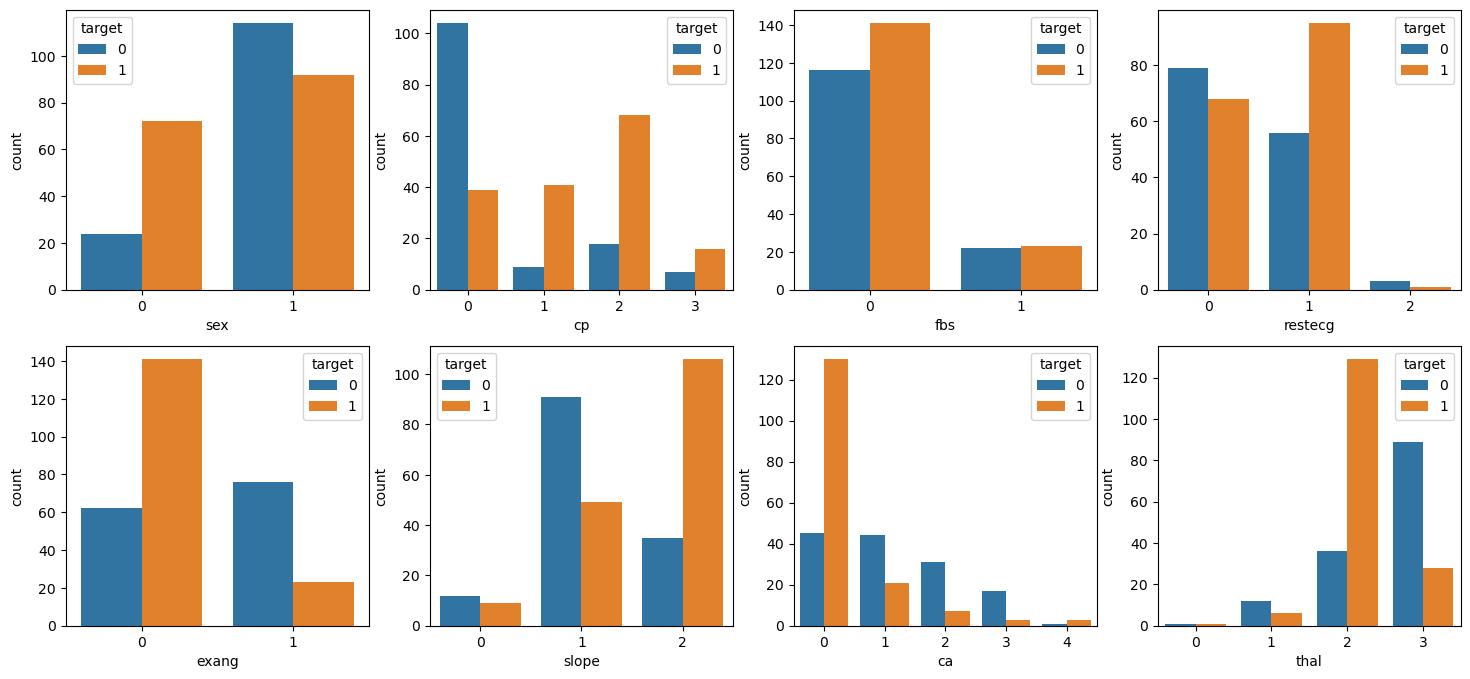

In [35]:
fig, axes = plt.subplots(2,4, figsize=(18,8))
for idx, col in enumerate(cat_col):
    ax = axes[int(idx/4), idx%4]
    sns.countplot(x=df[col], hue=df["target"], ax=ax)

#### Insights from the count plots

**sex**
- For females, the ratio of (disease/no disease) is much higher compared to males
- The ratio is more than 3 for women while less than 1 for men
- That means, women are more likely to have a heart disease

**cp->chest pain**
- Patients with cp=0 are least likely to have heart disease whereas patients with cp=2 or 3 are most likely to have heart disease

**fbs->fasting blood sugar**
- It appears that fbs is of no consequence in determining the target variable
- The ratio of disease/no disease for both the categories (0 & 1) appears to be almost similar

**restecg**
- The patients with restecg=2 are most likely to develop heart disease

**exang(Exercise-induced angina, 1=yes, 0=no)**
- Patients who test positive for exang are less likely to develop heart disease whereas the opposite is true for patients who test negative

**slope**
- Patients who fall under the slope category 2 are most likely to develop heart disease

**ca**
- Patients whose ca=0 are most likely to develop heart disease. The risk reduces as we move from 1 to 3, however the risk enhances again at ca=4

**thal**
- Patients who are categorized under the category equals to 2, are most likely to develop heart disease

### Correlation among variables

In [39]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [31]:
# Understanding correlations from the table can be challenging, let us plot a heatmap of the correlation

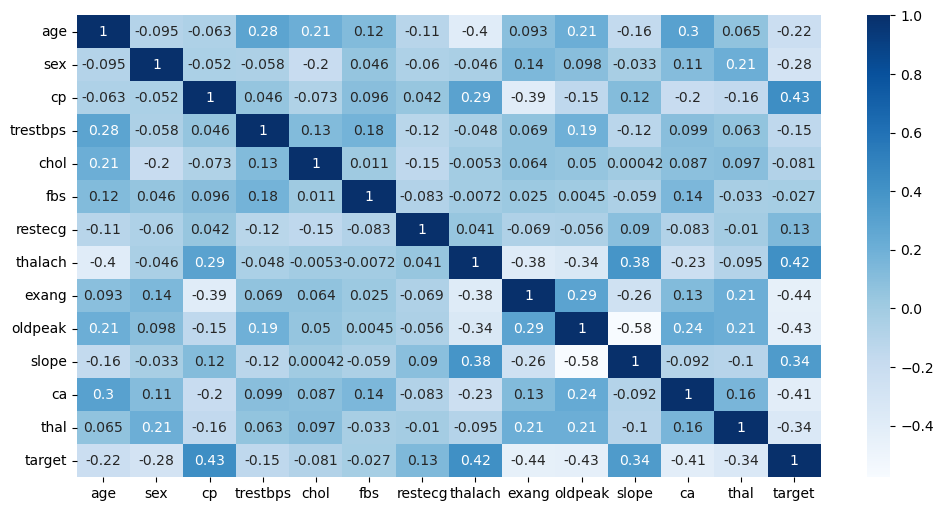

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

**We don't observe any strong correlation between variables. Correlation of >0.75 indicates strong positive correlation while a correlation of <-0.75 indicates a strong negative correlation**

### Checking outliers and data quality with AutoViz library

In [45]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [47]:
report = AV.AutoViz(df)

Shape of your Data Set loaded: (302, 14)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variable

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,13,29.000000,77.000000,No issue
sex,int64,0.000000,0,0.000000,1.000000,No issue
cp,int64,0.000000,1,0.000000,3.000000,No issue
trestbps,int64,0.000000,16,94.000000,200.000000,Column has 9 outliers greater than upper bound (170.00) or lower than lower bound(90.00). Cap them or remove them.
chol,int64,0.000000,50,126.000000,564.000000,Column has 5 outliers greater than upper bound (370.38) or lower than lower bound(115.38). Cap them or remove them.
fbs,int64,0.000000,0,0.000000,1.000000,No issue
restecg,int64,0.000000,0,0.000000,2.000000,No issue
thalach,int64,0.000000,30,71.000000,202.000000,Column has 1 outliers greater than upper bound (215.12) or lower than lower bound(84.12). Cap them or remove them.
exang,int64,0.000000,0,0.000000,1.000000,No issue
oldpeak,float64,0.000000,NA,0.000000,6.200000,Column has 5 outliers greater than upper bound (4.00) or lower than lower bound(-2.40). Cap them or remove them.


All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


**The report from the AutoViz_Class shows outliers for some of the columns. However, we are working on a heart disease dataset, where removing outliers is not ideal. Generally, for medical domain, for severe disease prediction, we do not remove outliers**

### Analysis with sweetviz lib 

In [51]:
import sweetviz as sv

In [53]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)


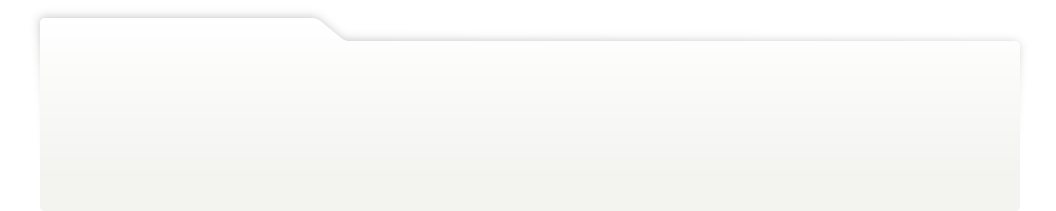
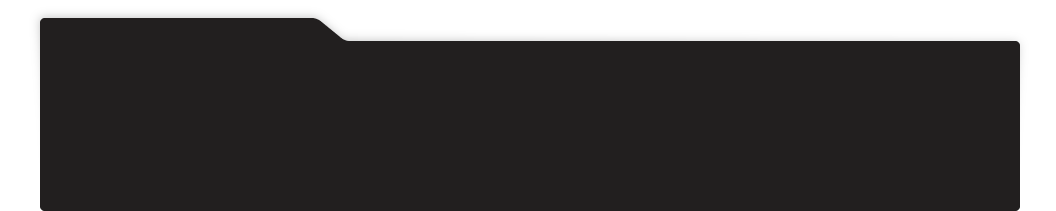
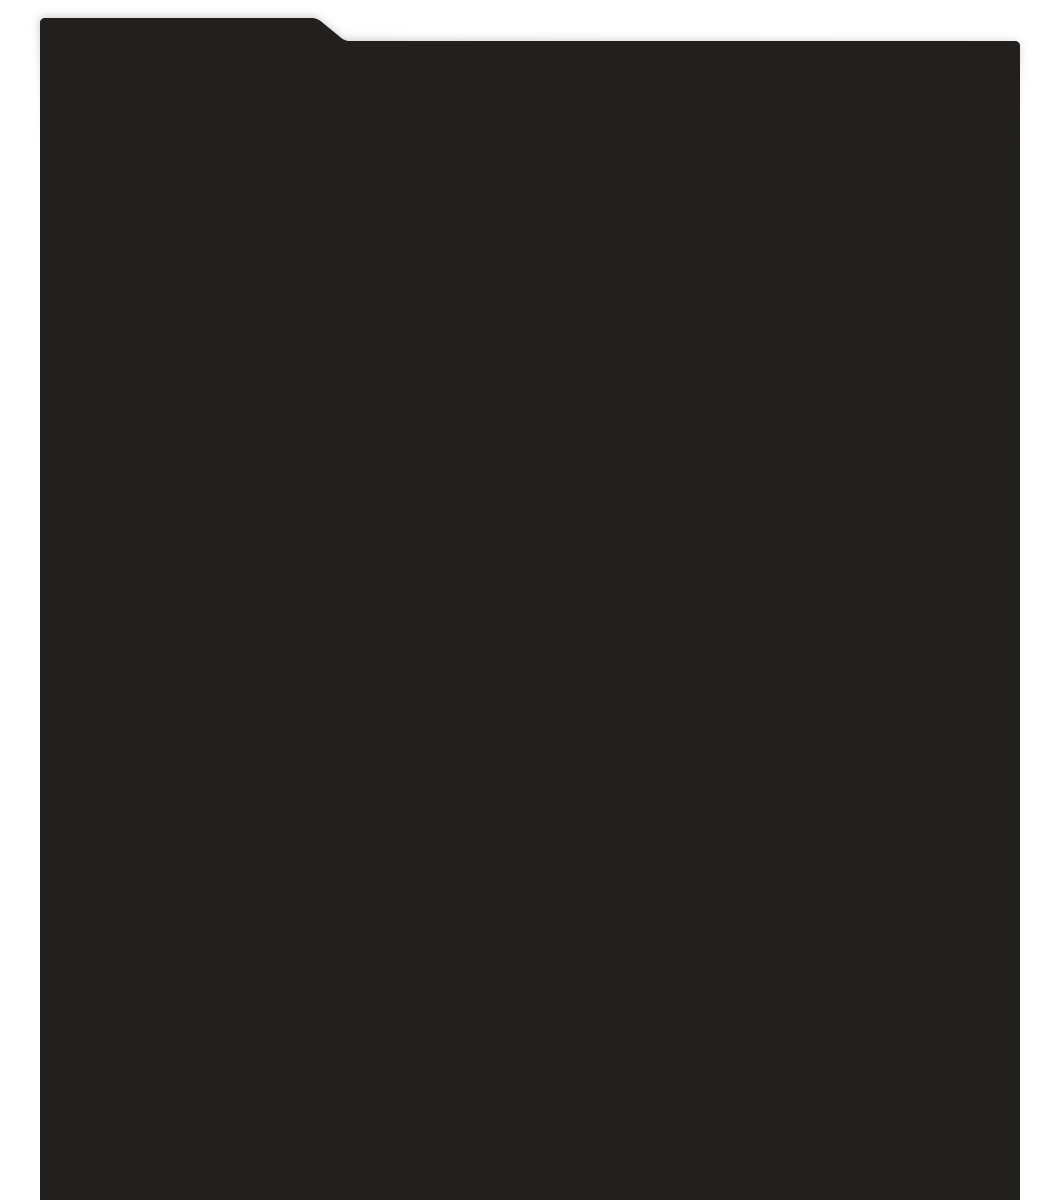
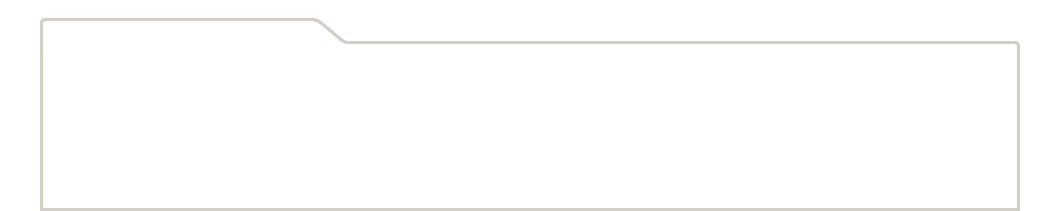
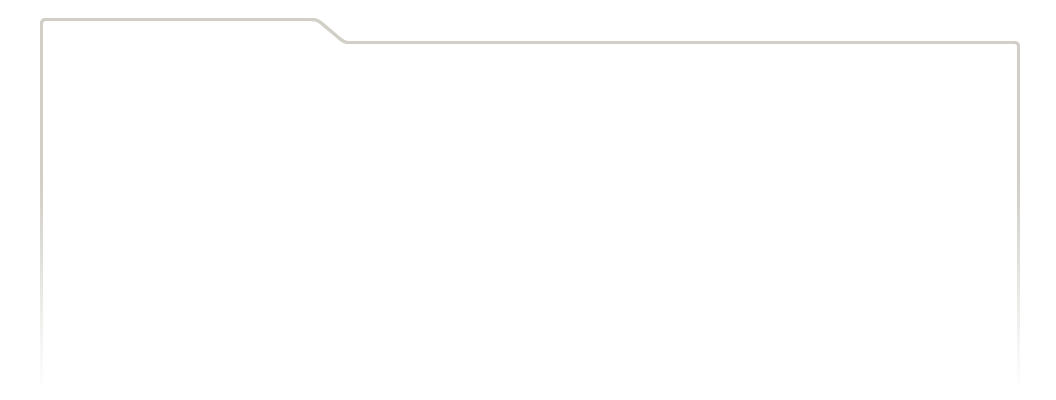
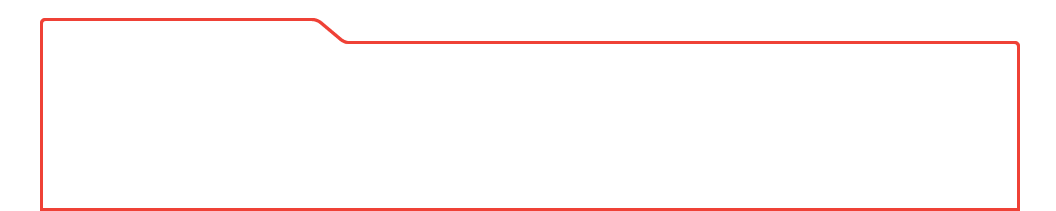
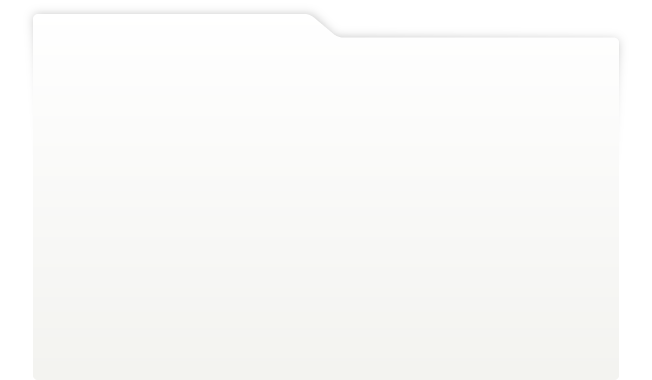
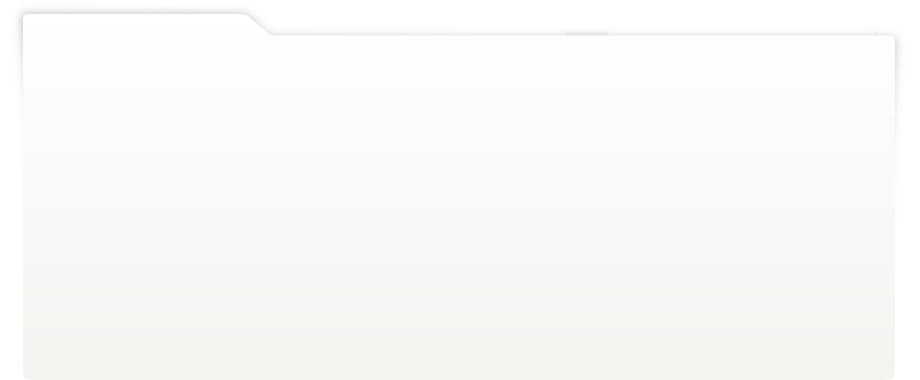
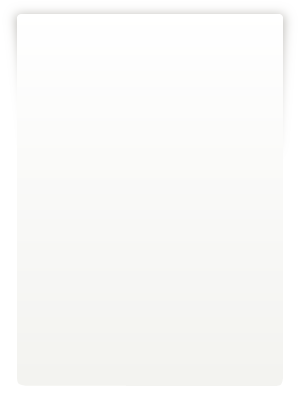
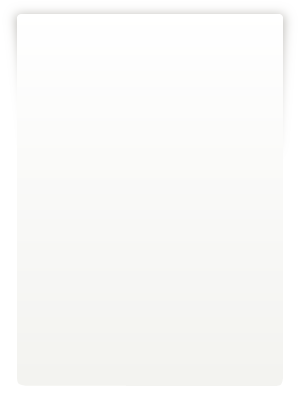
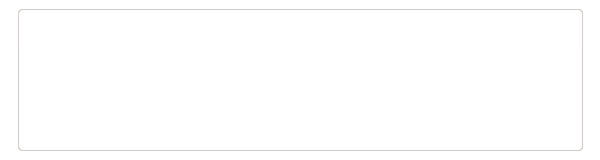
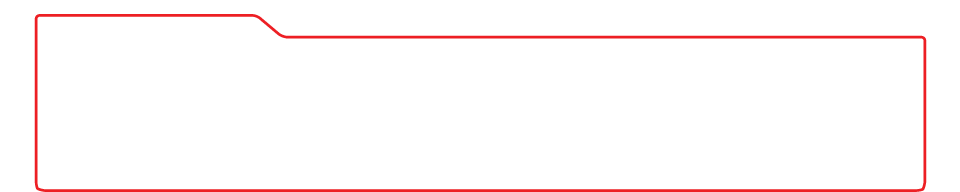
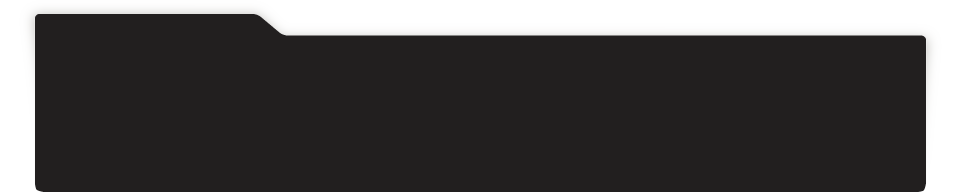
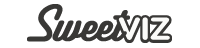
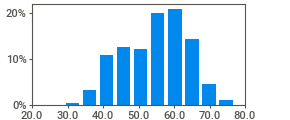
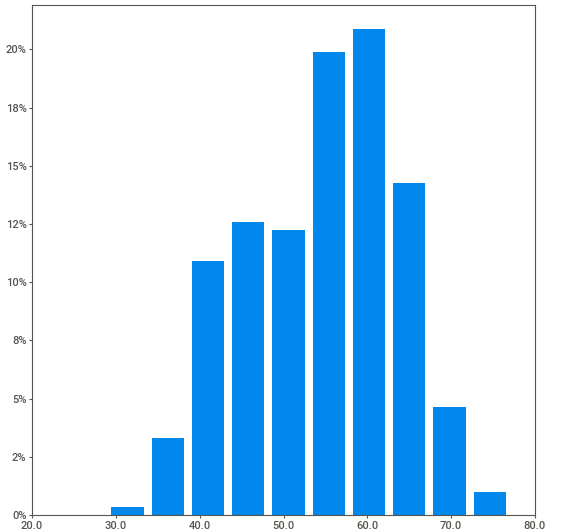
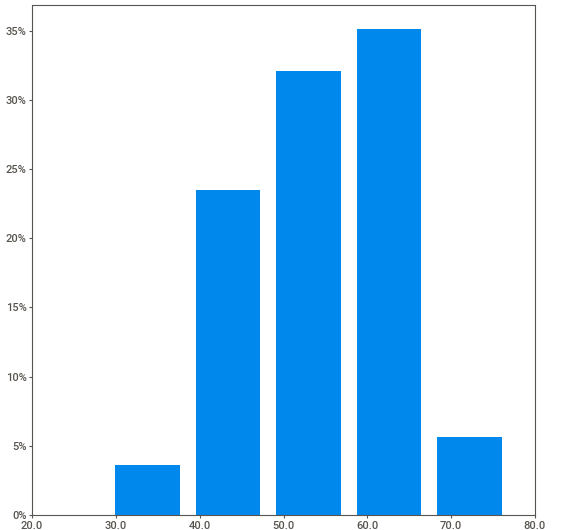
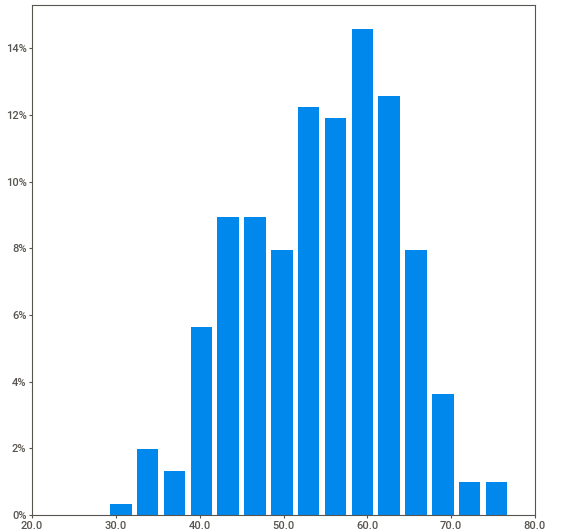
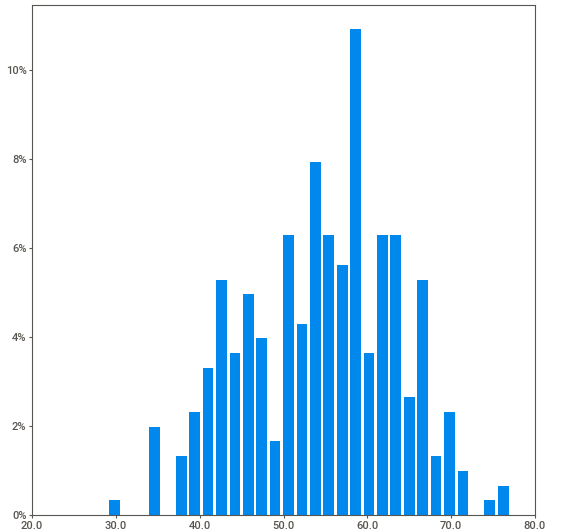
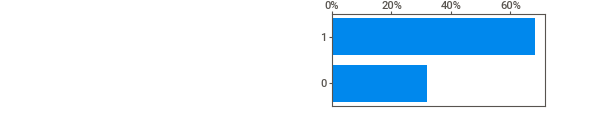
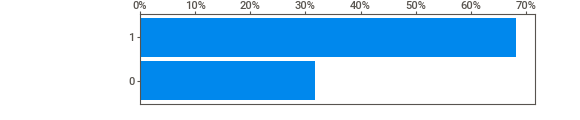
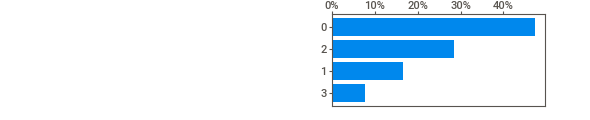
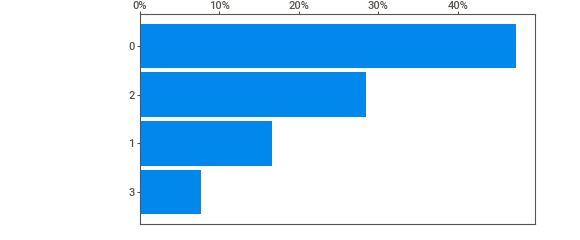
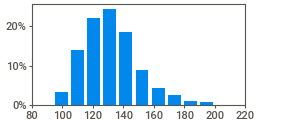
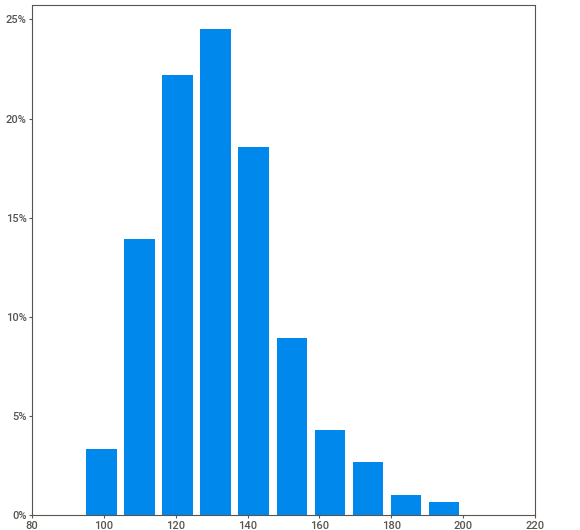
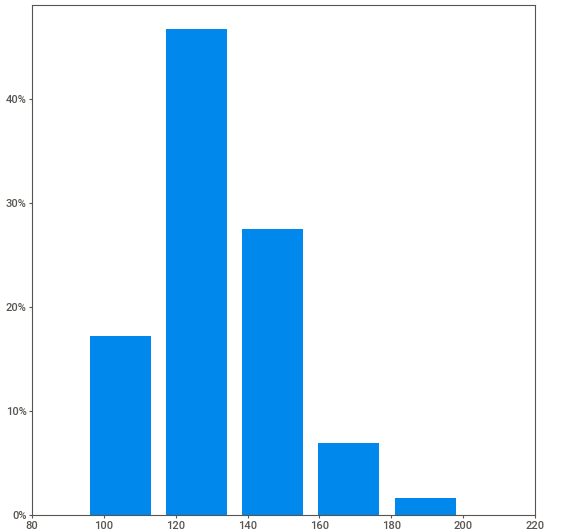
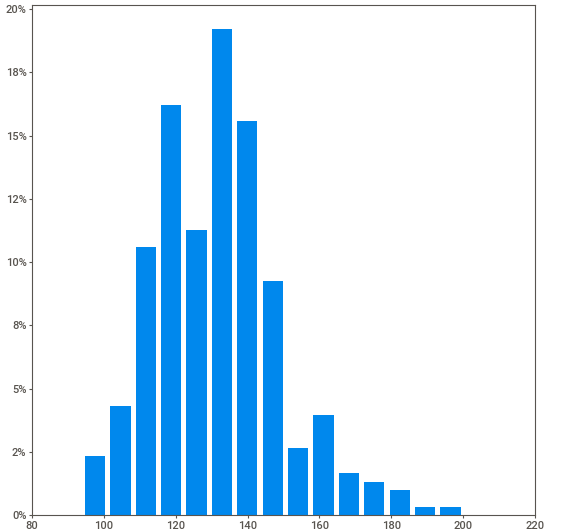
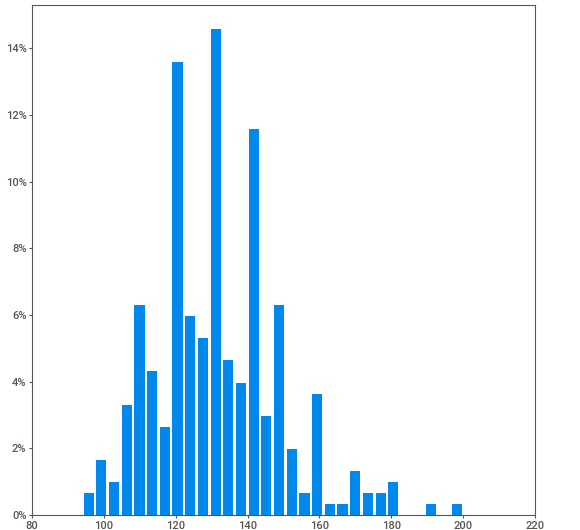
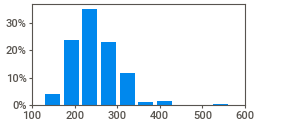
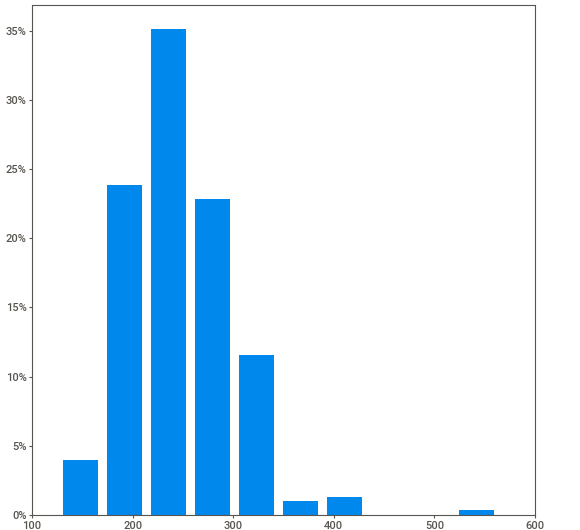
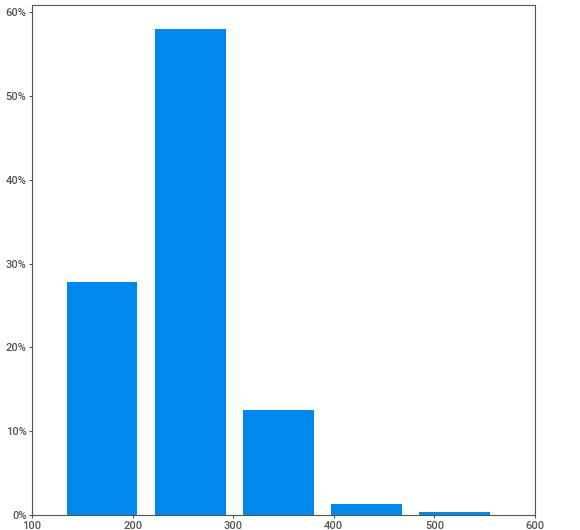
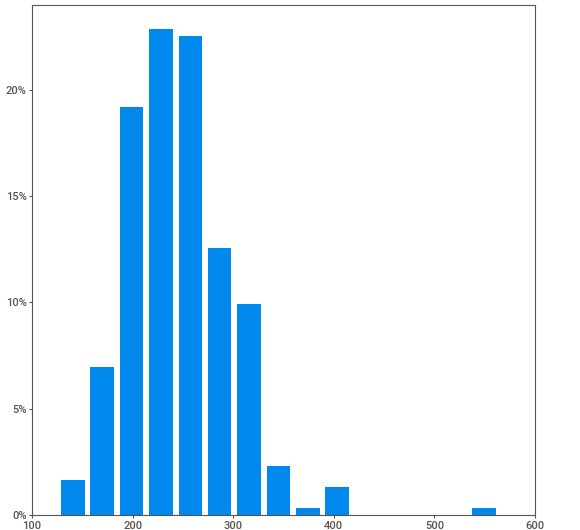
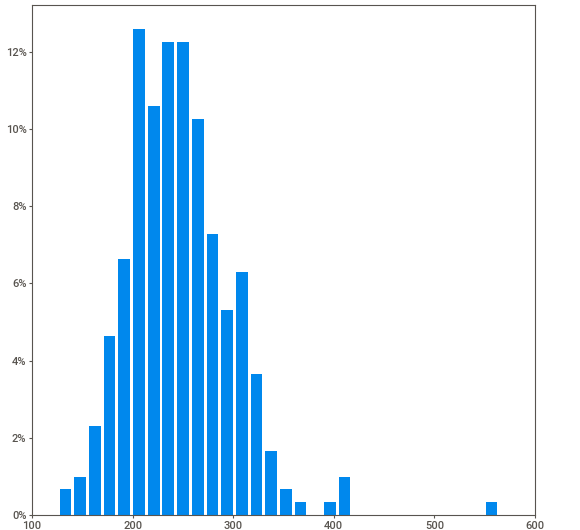
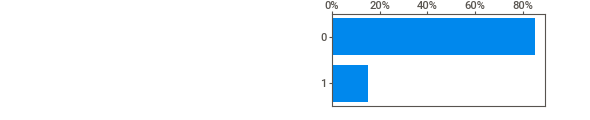
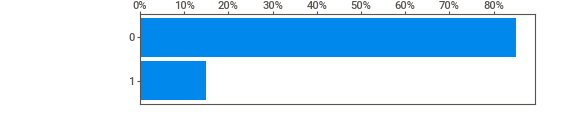
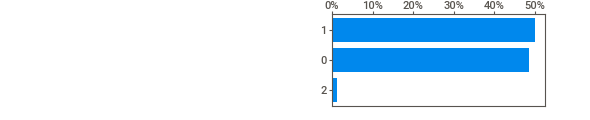
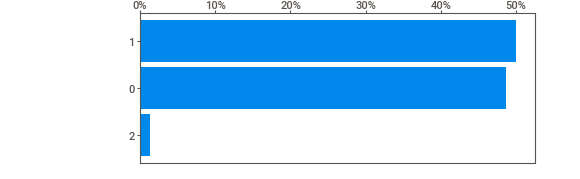
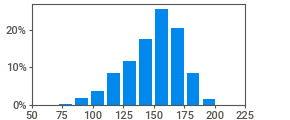
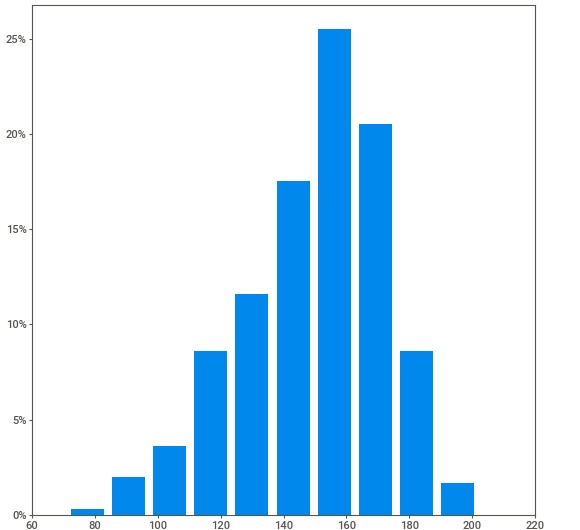
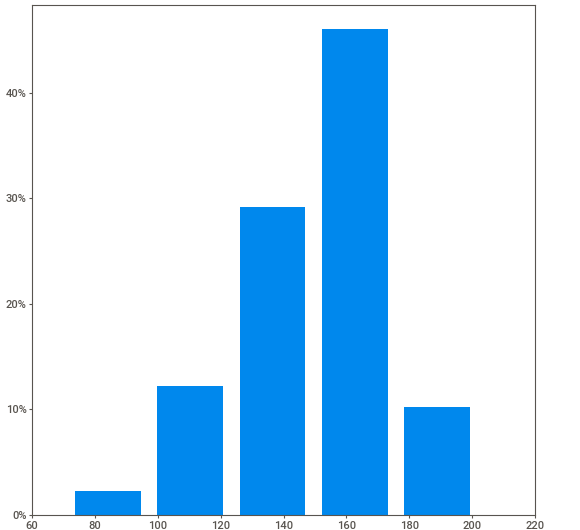
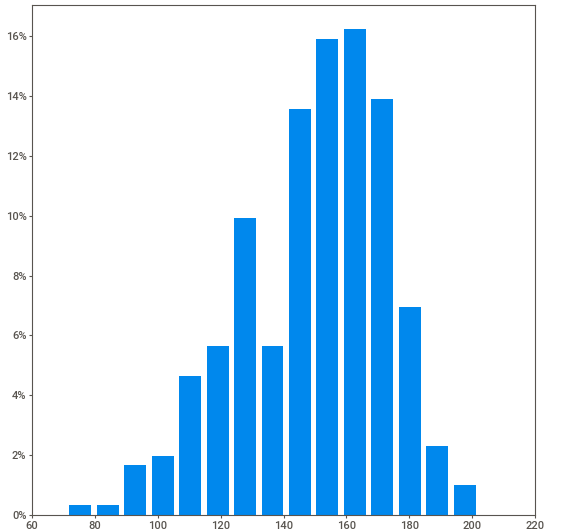
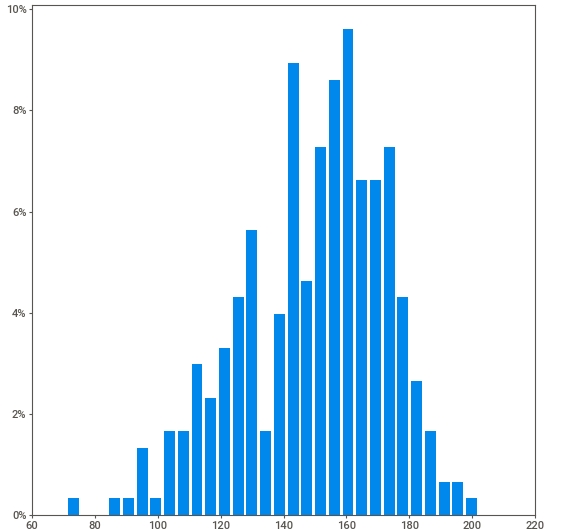
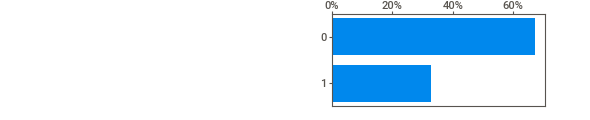
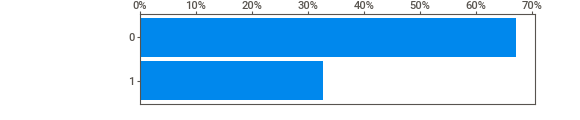
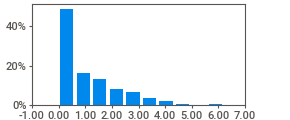
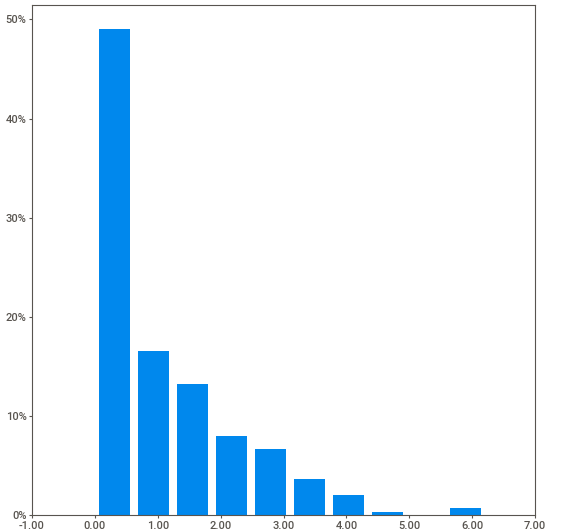
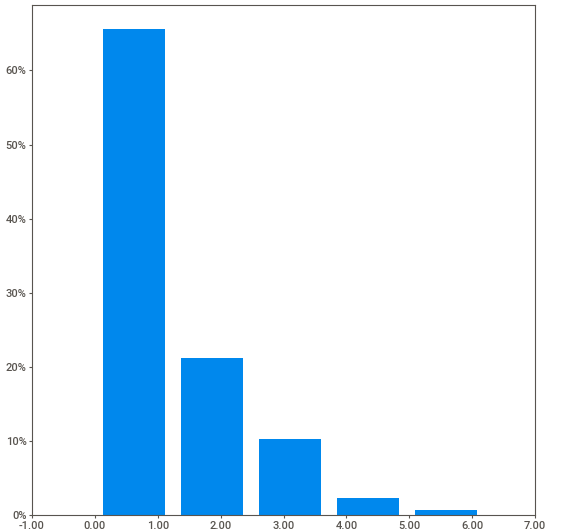
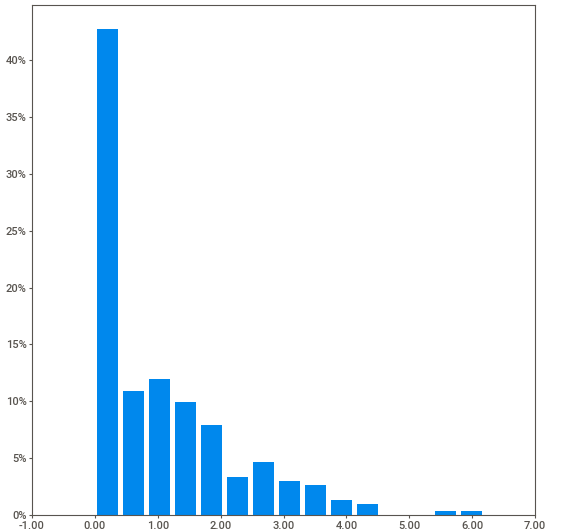
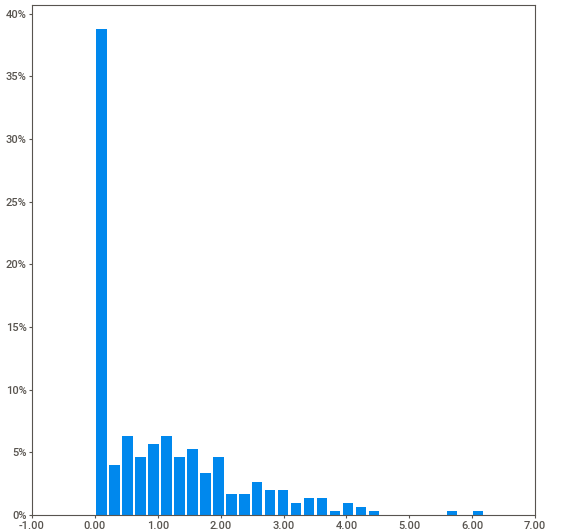
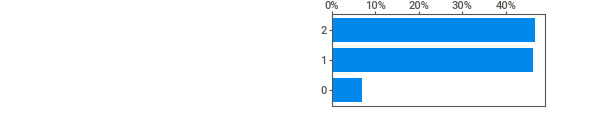
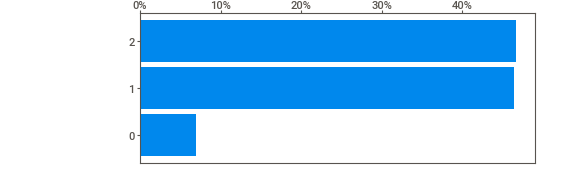
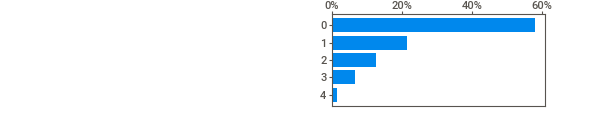
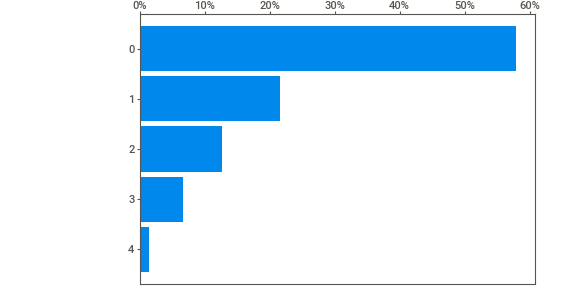
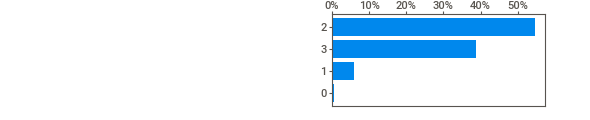
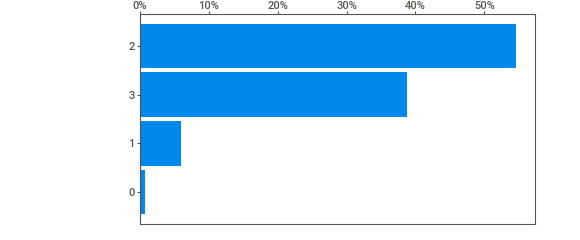
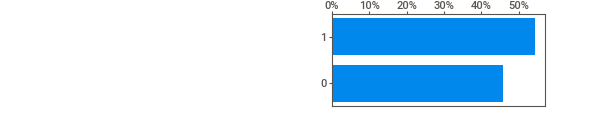
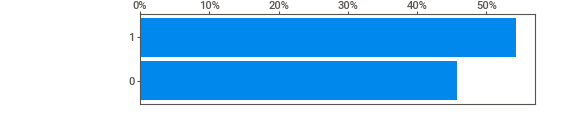
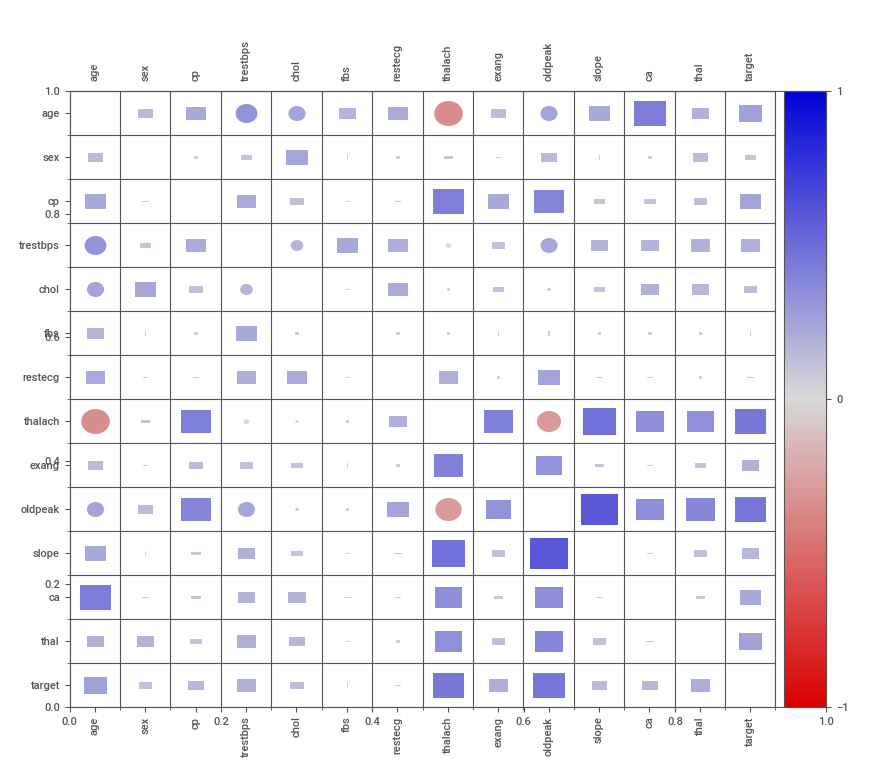
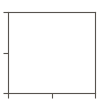

In [55]:
report.show_notebook()

- Sweetviz gives us all the statistical details, sum, skewness and Kurtosis of numerical columns and total values, missing and distinct values for categorical columns

- Kurtosis is a measure of the peakedness of the data
- If the data is concentrated more around the mean, then it has high Kurtosis that means we have a steeped bell-shaped curve with longer tails
- If the bell shape curve is not too steep, Kurtosis is low and the tails are smaller indicating less outliers

### Train, test, split 

In [60]:
X = df.drop(columns=["target"])

In [62]:
y=df["target"]

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.shape

(241, 13)

In [70]:
y_train.shape

(241,)

In [72]:
X_test.shape

(61, 13)

In [74]:
y_test.shape

(61,)

### Building the model

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
model_1 = DecisionTreeClassifier()

In [82]:
model_1.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predict the validation (test) data

In [85]:
y_pred_model_1 = model_1.predict(X_test)

#### Performance Metrics

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
accuracy_model_1 = accuracy_score(y_test, y_pred_model_1)

In [92]:
print("Accuracy of model 1 is:", accuracy_model_1*100)

Accuracy of model 1 is: 78.68852459016394


In [94]:
cm_1 = confusion_matrix(y_test, y_pred_model_1)

In [96]:
cm_1

array([[25,  4],
       [ 9, 23]], dtype=int64)

**Interpretation of confusion Matrix**

- For the array [25,4] class 0 -> 25 observatitons are True Positive. The actual class is 0, and the predicted class is also 0
-                      -> 4 observations are False negative. The actual class is  0, but the predicted class is 1
- For the array [9,23] class 1 -> 9 observations are False Positive. The actual class is 1, but the predicted is 0
-                      -> 23 observations are True Negative. The actual class is 1 and the predicted class is also 1

#### Plot the confusion matrix 

In [101]:
#The plot was not displaying after executing the below code without returning any error. If such an incident occurs execute the below line of code:
%matplotlib inline

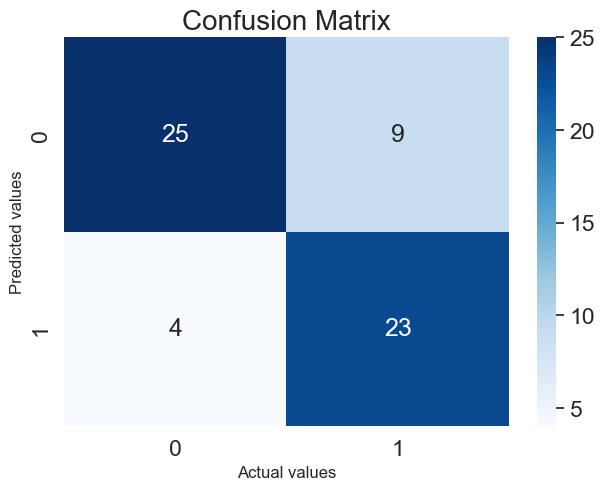

In [105]:
sns.set(font_scale=1.5)
sns.heatmap(cm_1.T, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Actual values", fontsize=12)
plt.ylabel("Predicted values", fontsize=12)
plt.show()

#### Classification report

In [108]:
clf_report_1 = classification_report(y_test, y_pred_model_1)

In [110]:
print(clf_report_1)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



**precision = TP/(TP+FP) or TN/(TN+FN)**
- Precision is the ratio of correctly predicted positive observations to the total predicted positives or
- The ratio of correctly predicted negative observations to the total predicted negatives

**recall = TP/(TP+FN) or TN/(TN+FP)**
- recall is the ratio of correctly predicted positives to the total actual positives(all the observations in the actual class) or
- It is the ratio of correctly predicted negatives to the total actual negatives(all the observations in the actual class)

**f1-score = 2((precision*recall)/(precision+recall))**
- f1-score is the harmonic mean of precision and recall. It is useful when the class distribution is imbalanced

**accuracy = (TP+TN)/Total observations**

- macro avg = arithmetic avg
- macro avg for precision = (0.74+0.85)/2 = 0.79
- macro avg for recall = (0.86+0.72)/2 = 0.79

- Weighted avg = considers the support of each class
- weighted avg of precision = (29/(29+32))*0.74 + (32/(32+29))*0.85 or to simplify (29*0.74+32*0.85)/(29+32)

### GridSearchCV (Hyper parameter tuning)

In [114]:
from sklearn.model_selection import GridSearchCV

In [122]:
model_2 = DecisionTreeClassifier()

**Decision Tree Parameters**

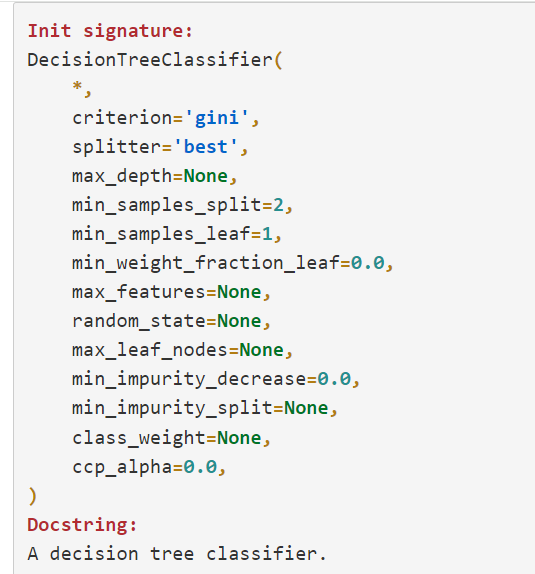ic_cst=None,
)

In [117]:
grid_param = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 10, 20, 30],
             'min_samples_split': [2, 5, 10, 20],
             'min_samples_leaf': [1,2,4,8]}

#### Perform grid search with cross-validation 

In [124]:
grid_search = GridSearchCV(estimator=model_2, param_grid=grid_param, cv=5, scoring="accuracy", n_jobs=-1)

In [126]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

#### Print the best hyper parameters and the best score 

In [128]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [130]:
print("Best accuracy score:", grid_search.best_score_*100)

Best accuracy score: 79.27721088435374


#### Evaluate the best model on the test set 

In [132]:
best_model = grid_search.best_estimator_

In [134]:
test_accuracy = best_model.score(X_test, y_test)

In [136]:
print("test accuracy of best estimator:", test_accuracy*100)

test accuracy of best estimator: 80.32786885245902


In [138]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4)

In [140]:
y_pred_2 = best_model.predict(X_test)

In [142]:
accuracy_best_model = accuracy_score(y_test,y_pred_2)

In [144]:
accuracy_best_model*100

80.32786885245902

In [146]:
# As we can observe, there is hardly any difference in the accuracy after hyper parameter tuning

### Plotting the decision tree 

In [329]:
!pip install scikit-learn matplotlib graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00


In [149]:
import graphviz

In [151]:
from sklearn import tree

In [153]:
y = y.astype(str)

In [155]:
y.unique()

array(['1', '0'], dtype=object)

In [157]:
dot_data = tree.export_graphviz(model_1, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

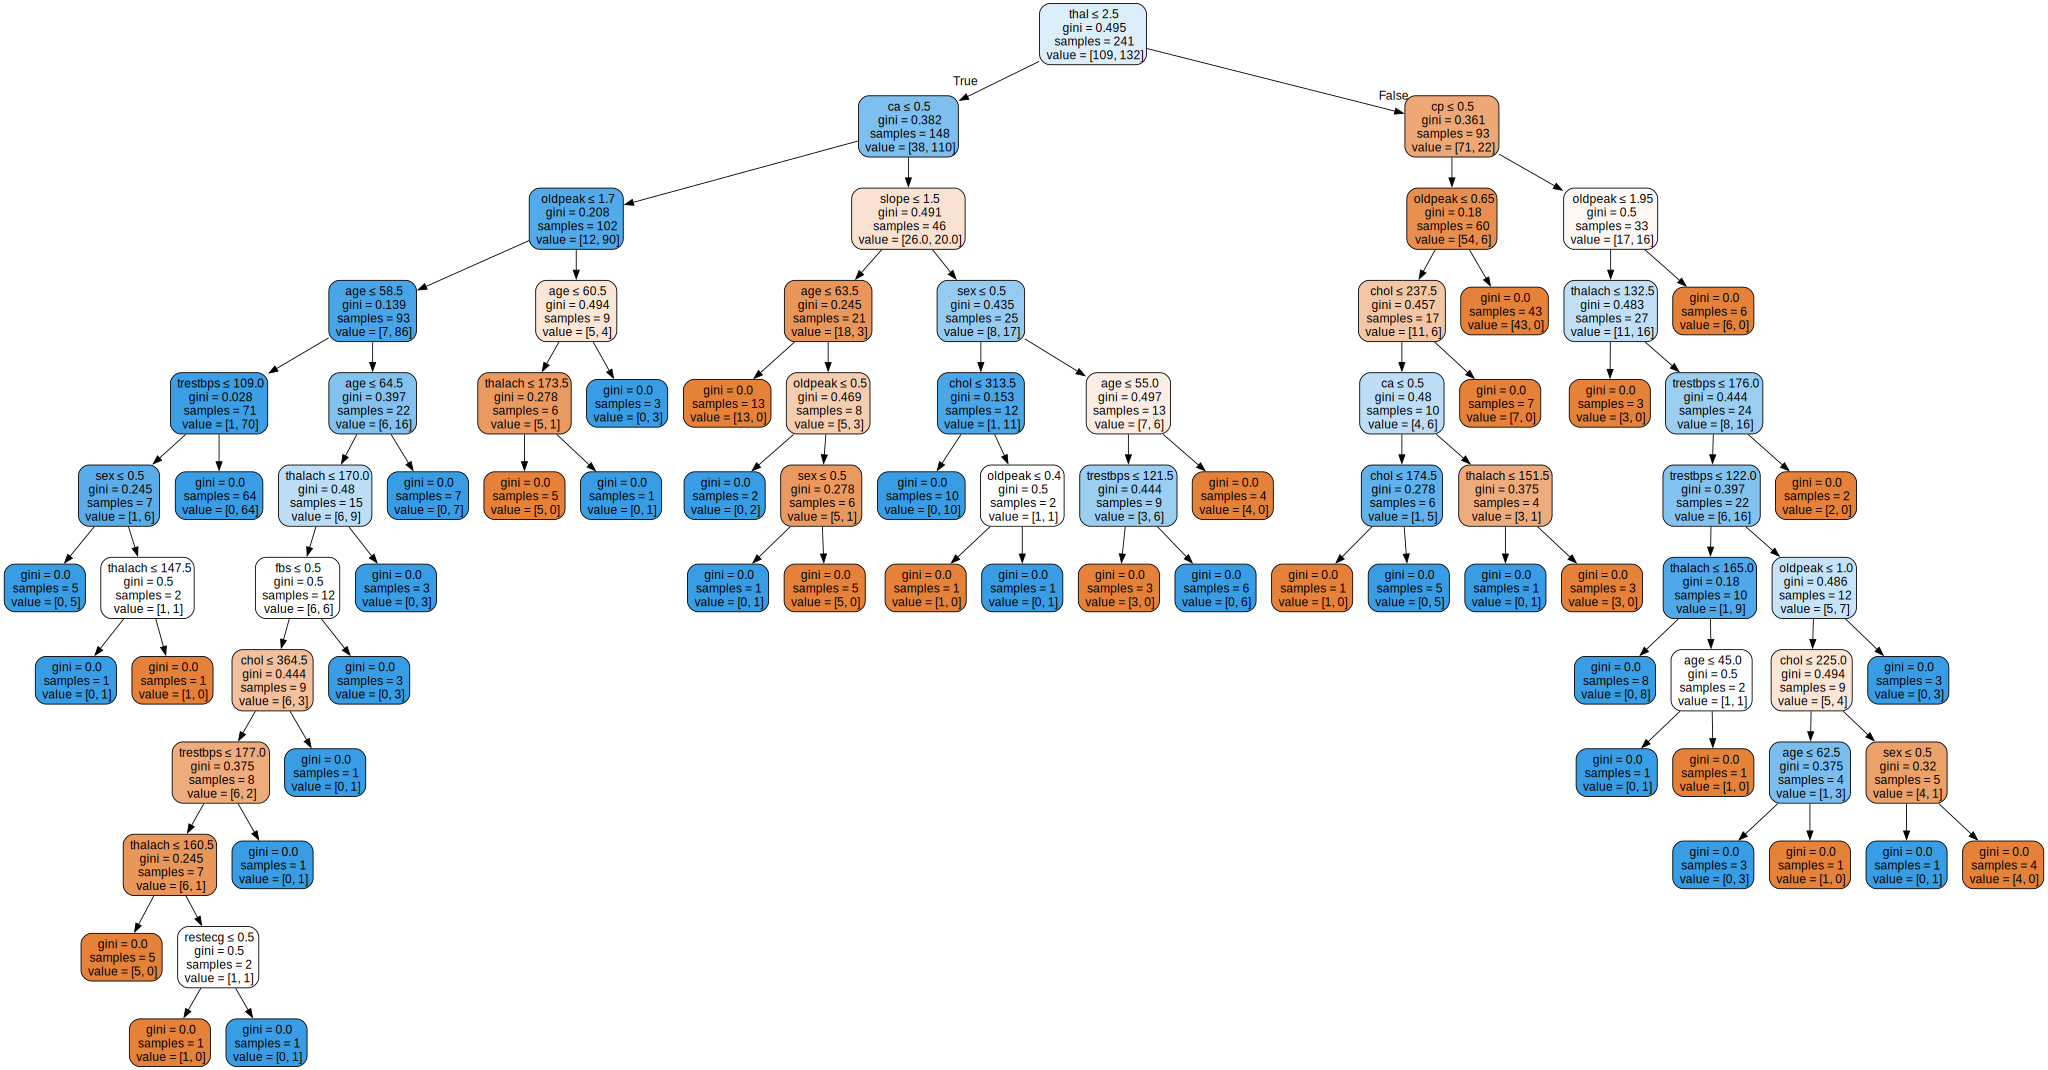

In [159]:
graph

**Here, we achieved a model accuracy of nearly 80%. Generally, for medical domain we need relatively high accuracy of more than 95%. Hence, random forest might be a more suitable algorithm here**